# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
data1=pd.read_csv("HAM10000_metadata.csv",encoding='utf-8')
data2=pd.read_csv("hmnist_28_28_RGB.csv",encoding='utf-8')


In [3]:
data1

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
classes={
    'akiec':'actinic keratoses and intraepithelial carcinom',
    'bcc':'basal cell carcinoma',
    'bkl':'benign keratosis-like lesions',
    'df':'dermatofibroma',
    'nv':'melanocytic nevi',
    'vasc':'pyogenic granulomas and hemorrhage',
    'mel':'melanoma'
}

In [5]:
# data1['path'] = data1['image_id'].map(imageid_path_dict.get)
data1['cell_type'] = data1['dx'].map(classes.get) 
data1['cell_type'] = pd.Categorical(data1['cell_type'])
data1['cell_type_idx'] = pd.Categorical(data1['cell_type']).codes

In [6]:
data1

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,benign keratosis-like lesions,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,actinic keratoses and intraepithelial carcinom,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,actinic keratoses and intraepithelial carcinom,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,actinic keratoses and intraepithelial carcinom,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,actinic keratoses and intraepithelial carcinom,0


In [7]:
data2

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   lesion_id      10015 non-null  object  
 1   image_id       10015 non-null  object  
 2   dx             10015 non-null  object  
 3   dx_type        10015 non-null  object  
 4   age            9958 non-null   float64 
 5   sex            10015 non-null  object  
 6   localization   10015 non-null  object  
 7   cell_type      10015 non-null  category
 8   cell_type_idx  10015 non-null  int8    
dtypes: category(1), float64(1), int8(1), object(6)
memory usage: 567.7+ KB


In [9]:
classes={
    0:('akiec','actinic keratoses and intraepithelial carcinom'),
    1:('bcc','basal cell carcinoma'),
    2:('bkl','benign keratosis-like lesions'),
    3:('df','dermatofibroma'),
    4:('nv','melanocytic nevi'),
    5:('vasc','pyogenic granulomas and hemorrhage'),
    6:('mel','melanoma')
}

In [10]:
data1['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

# Exploratory Data Analysis

C:\Users\Manoj Kuliyal\AppData\Local\Temp\ipykernel_10476\3989187481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data1['dx'], palette='bright', saturation=0.75, order=data1['dx'].value_counts().index, orient='v')


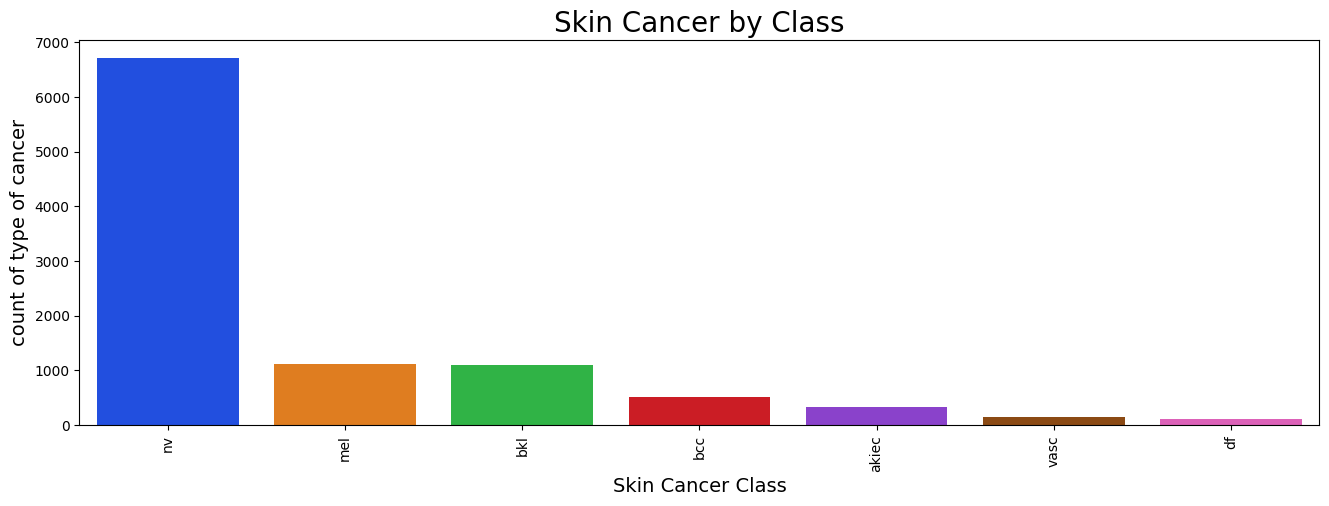

In [11]:
#Plot the Frequency of each type of Cancer by class
plt.figure(figsize=(16, 5))
sns.countplot(x=data1['dx'], palette='bright', saturation=0.75, order=data1['dx'].value_counts().index, orient='v')
plt.title('Skin Cancer by Class', fontsize=20)
plt.xlabel('Skin Cancer Class', fontsize=14)
plt.ylabel('count of type of cancer', fontsize=14)
plt.xticks(rotation=90)
plt.show()

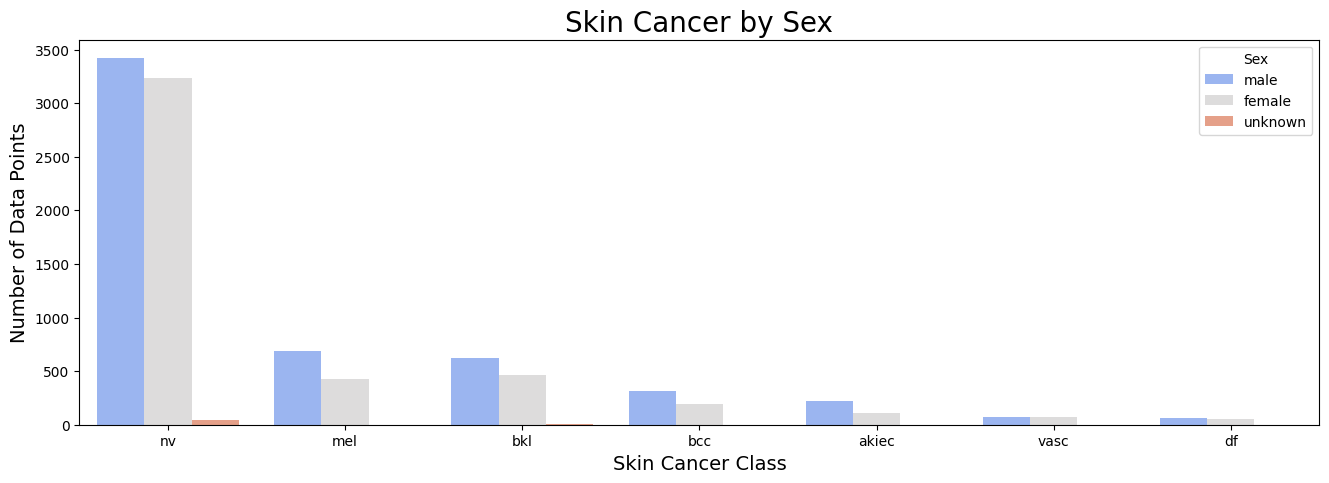

In [12]:
plt.figure(figsize=(16, 5))
sns.countplot(x=data1['dx'], hue=data1['sex'], palette='coolwarm', saturation=0.75, order=data1['dx'].value_counts().index, orient='v')
plt.title('Skin Cancer by Sex', fontsize=20)
plt.xlabel('Skin Cancer Class', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.legend(title='Sex')
plt.show()

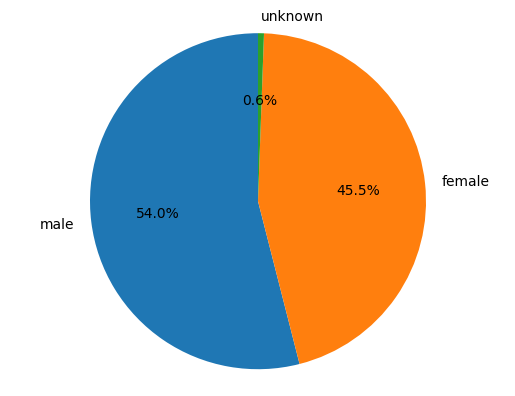

In [13]:
import matplotlib.pyplot as plt

tmp = data1['sex'].value_counts().reset_index()
tmp.columns = ['sex', 'count']

fig, ax = plt.subplots()
ax.pie(tmp['count'], labels=tmp['sex'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  

plt.show()

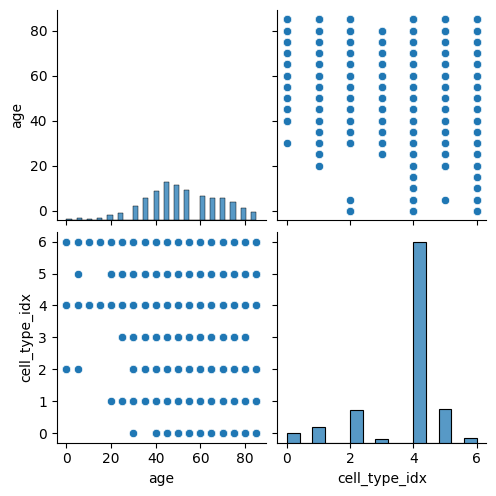

In [14]:
sns.pairplot(data1)

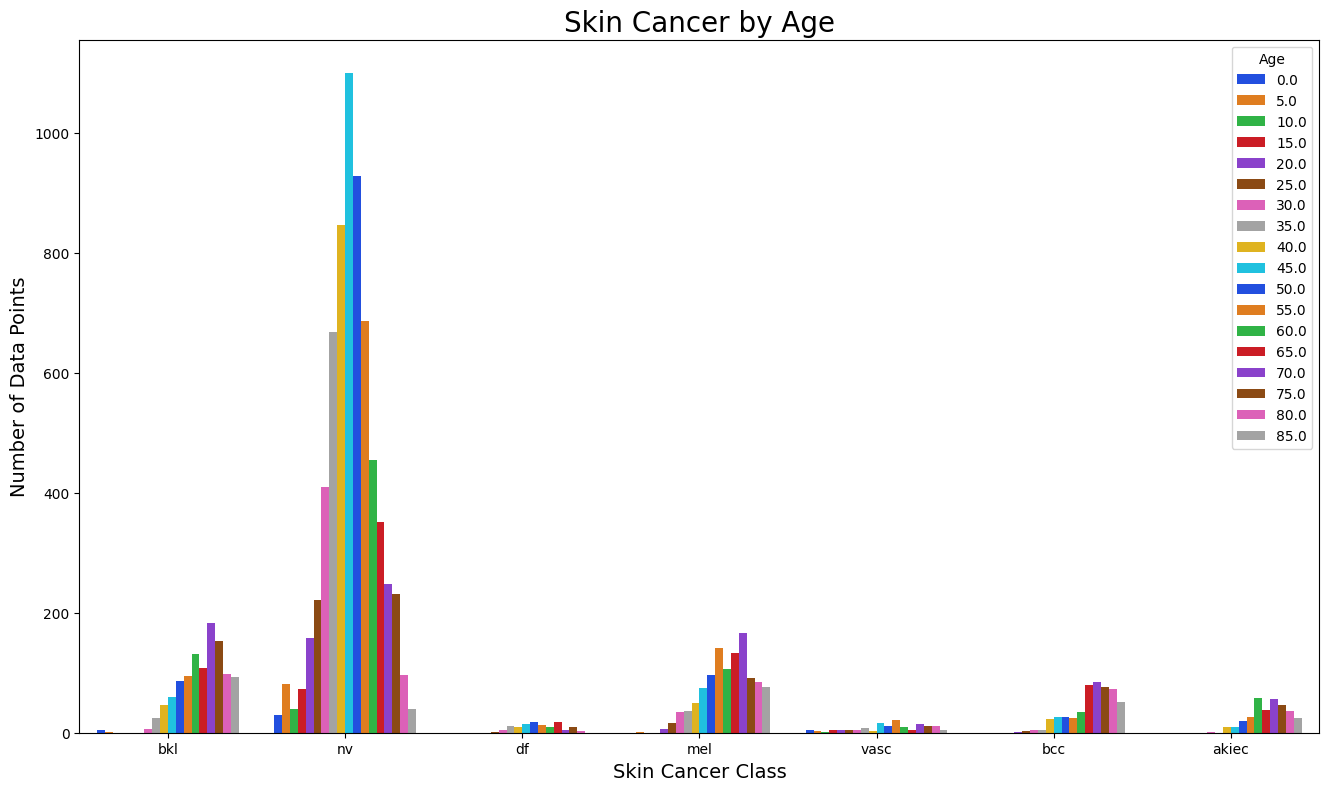

In [15]:
plt.figure(figsize=(16, 9))
sns.countplot(x="dx", hue="age", palette='bright', data=data1)
plt.title('Skin Cancer by Age', fontsize=20)
plt.xlabel('Skin Cancer Class', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.legend(title='Age')
plt.show()

# Separating Dependent and Independent Variables from the dataset

In [16]:
Label = data2["label"]
Data2 = data2.drop(columns=["label"])

In [17]:
import tensorflow as tf
Data2 = np.array(Data2).reshape(-1, 28, 28, 3)
Data2= Data2 / 255.0  # Normalizing the data
# Data2= tf.convert_to_tensor(Data2, dtype=tf.float32)
# Resize images to 32x32 pixels
# Data_resized = tf.image.resize(Data2, [32, 32], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR).numpy()

In [18]:
Data2

array([[[[0.75294118, 0.6       , 0.75686275],
         [0.76470588, 0.60784314, 0.75294118],
         [0.77254902, 0.60392157, 0.7254902 ],
         ...,
         [0.75686275, 0.56470588, 0.6       ],
         [0.77254902, 0.60392157, 0.63921569],
         [0.76078431, 0.59607843, 0.62745098]],

        [[0.77254902, 0.63529412, 0.79215686],
         [0.78823529, 0.62745098, 0.77254902],
         [0.79215686, 0.62745098, 0.75686275],
         ...,
         [0.76078431, 0.57647059, 0.58431373],
         [0.77647059, 0.61960784, 0.65098039],
         [0.75294118, 0.6       , 0.65490196]],

        [[0.77254902, 0.60784314, 0.75686275],
         [0.77647059, 0.60392157, 0.7254902 ],
         [0.79215686, 0.61176471, 0.74901961],
         ...,
         [0.76078431, 0.58431373, 0.59607843],
         [0.78039216, 0.63137255, 0.69411765],
         [0.76078431, 0.61176471, 0.68627451]],

        ...,

        [[0.76078431, 0.61568627, 0.74901961],
         [0.80784314, 0.67843137, 0.80784314]

In [19]:
data2['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [20]:
classes={
    0:('akiec','actinic keratoses and intraepithelial carcinom'),
    1:('bcc','basal cell carcinoma'),
    2:('bkl','benign keratosis-like lesions'),
    3:('df','dermatofibroma'),
    4:('nv','melanocytic nevi'),
    5:('vasc','pyogenic granulomas and hemorrhage'),
    6:('mel','melanoma')
}

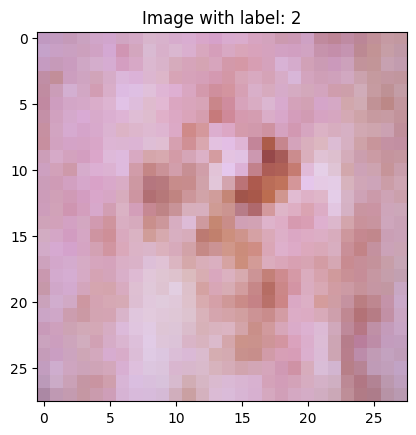

In [21]:
from IPython.display import clear_output
index_to_display = 0 
plt.imshow(Data2[index_to_display])
plt.title(f"Image with label: {Label[index_to_display]}")
plt.show()
clear_output(wait=True)

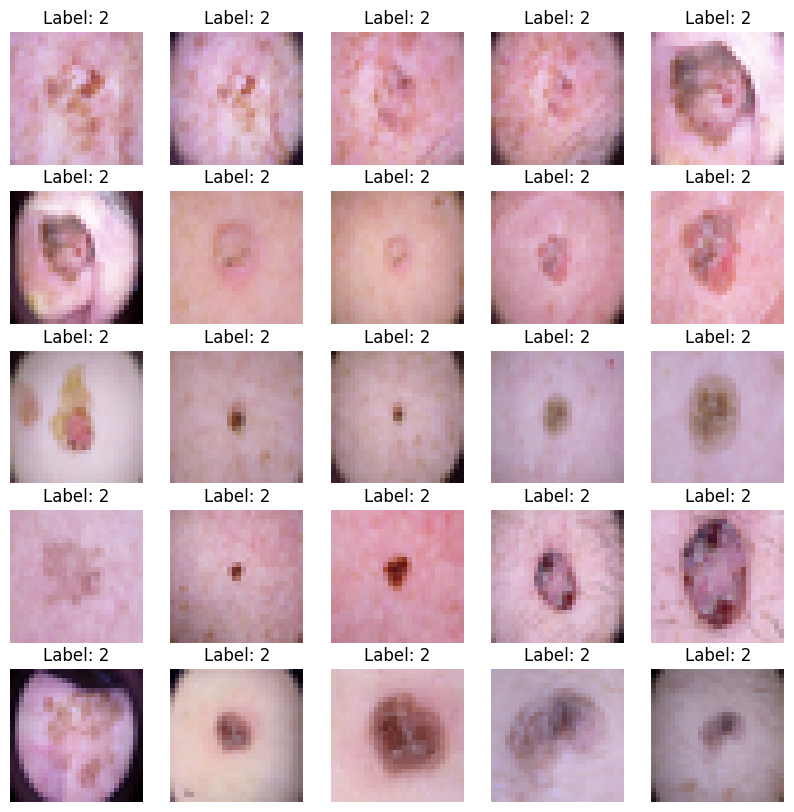

In [22]:
num_rows = 5
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        axes[i, j].imshow(Data2[index])
        axes[i, j].set_title(f"Label: {Label[index]}")
        axes[i, j].axis('off')

plt.show()

In [23]:
from tensorflow.keras.utils import to_categorical

Label = to_categorical(Label, num_classes=7)

# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Data2,Label,test_size=0.25,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)

(7511, 28, 28, 3)
(2504, 28, 28, 3)


In [26]:
print(y_train.shape)
print(y_test.shape)

(7511, 7)
(2504, 7)


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
AugmentedData=ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

In [28]:
AugmentedData

In [29]:
AugmentedData.fit(X_train)

# Modelling the Data

## Simple CNN Model

In [30]:
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
def accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [31]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop

In [32]:
model=Sequential()

In [33]:
model.add(Conv2D(64,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(1024,(2,2),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Conv2D(1024,(1,1),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[accuracy])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 512)       131584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 512)        0         
 2D)                                                             
                                                        

In [34]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early=EarlyStopping(monitor='accuracy',patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=2, verbose=1, mode='min', min_lr=0.0001)
     

In [35]:
class_weights={0:1,1:1,2:1,3:1,4:0.5,5:1,6:1}

In [ ]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[reduce_lr,early],class_weight=class_weights)

Epoch 1/30
235/235 [==============================] - 228s 950ms/step - loss: 1.1029 - accuracy: 0.7687 - val_loss: 2.1570 - val_accuracy: 0.0807 - lr: 0.0010
Epoch 2/30
235/235 [==============================] - 217s 925ms/step - loss: 0.7863 - accuracy: 0.8244 - val_loss: 1.4389 - val_accuracy: 0.7831 - lr: 0.0010
Epoch 3/30
179/235 [=====================>........] - ETA: 43s - loss: 0.7229 - accuracy: 0.8403

# Evaluation

In [ ]:
plt.figure(figsize=(15,10))
loss=pd.DataFrame(model.history.history)
loss[['accuracy','val_accuracy']].plot()

In [ ]:
plt.figure(figsize=(15,10))
loss[['loss','val_loss']].plot()

In [ ]:
plt.figure(figsize=(10,8))

pred=model.predict(X_test)

from sklearn.metrics import roc_curve,auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(7):
    plt.plot(fpr[i],tpr[i],label=classes[i],linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2,label='random guess')
plt.legend(loc="lower right")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

predictions = np.argmax(model.predict(X_test), axis=1)

check = []
for i in range(len(y_test)):
    for j in range(7):
        if y_test[i][j] == 1:
            check.append(j)
check = np.asarray(check)

print(classification_report(check, predictions))
